In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def rd2bin(a):
    b=list(a)
    for i in range(len(b)):
        if b[i] == 'R': b[i]=0
        if b[i] == 'D': b[i]=1
    return b

def avnp(l):
    l=list(l)
    return sum(l)/len(l)

In [3]:
testsize=0.30
randomstate=4444

In [4]:
data=pd.read_csv('/Users/Adam/Downloads/house-votes-84.data',header=None)
def yn(s): #yes i know this is sloppy
    if s=='y': return 1
    if s=='n': return 0
    if s=='republican': return 'R'
    if s=='democrat': return 'D'
data=data.applymap(yn)

for s in range(1,len(data.columns.tolist())):
    m=data[s].sum()/data[s].count()
    data[s].fillna(value=m,inplace=True)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,R,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,R,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,D,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,D,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,D,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer
accuracy_scorer=make_scorer(accuracy_score)
precision_scorer=make_scorer(precision_score)
recall_scorer=make_scorer(recall_score)
f1_scorer=make_scorer(f1_score)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


/Users/Adam/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=testsize)
X=data.iloc[:,1:]
Y=data.iloc[:,0]

**Challenge 1 and 2**

In [7]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

zip(['Accuracy','Precision','Recall','F1'],[accuracy_score(ytest,ypred),
     precision_score(ytest,ypred,pos_label='D'),
     recall_score(ytest,ypred,pos_label='D'),
     f1_score(ytest,ypred,pos_label='D')])

[('Accuracy', 0.95419847328244278),
 ('Precision', 1.0),
 ('Recall', 0.9178082191780822),
 ('F1', 0.95714285714285707)]

In [8]:
zip(['Accuracy CV','Precision CV','Recall CV','F1 CV'],
    [avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=accuracy_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=precision_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=recall_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=f1_scorer))])


[('Accuracy CV', 0.93333333333333324),
 ('Precision CV', 0.96137186764574845),
 ('Recall CV', 0.92883895131086136),
 ('F1 CV', 0.94480419963178575)]

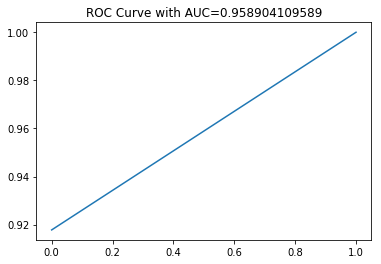

In [9]:
fpr,tpr,thresh = roc_curve(rd2bin(ytest.as_matrix()),rd2bin(ypred))
auc = roc_auc_score(rd2bin(ytest.as_matrix()),rd2bin(ypred))

plt.plot(fpr,tpr)
plt.title('ROC Curve with AUC='+str(auc));

In [10]:
model= LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

zip(['Accuracy','Precision','Recall','F1'],[accuracy_score(ytest,ypred),
     precision_score(ytest,ypred,pos_label='D'),
     recall_score(ytest,ypred,pos_label='D'),
     f1_score(ytest,ypred,pos_label='D')])

[('Accuracy', 0.96183206106870234),
 ('Precision', 0.97222222222222221),
 ('Recall', 0.95890410958904104),
 ('F1', 0.96551724137931039)]

In [11]:
zip(['Accuracy CV','Precision CV','Recall CV','F1 CV'],
    [avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=accuracy_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=precision_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=recall_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=f1_scorer))])

[('Accuracy CV', 0.96091954022988502),
 ('Precision CV', 0.9701633310328962),
 ('Recall CV', 0.9662921348314607),
 ('F1 CV', 0.96786426422804617)]

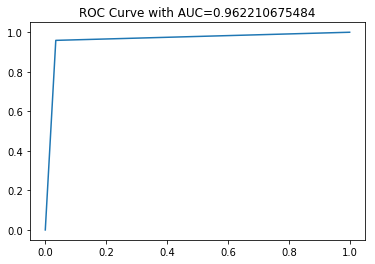

In [12]:
fpr,tpr,thresh = roc_curve(rd2bin(ytest.as_matrix()),rd2bin(ypred))
auc = roc_auc_score(rd2bin(ytest.as_matrix()),rd2bin(ypred))

plt.plot(fpr,tpr)
plt.title('ROC Curve with AUC='+str(auc));

In [13]:
model= GaussianNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

zip(['Accuracy','Precision','Recall','F1'],[accuracy_score(ytest,ypred),
     precision_score(ytest,ypred,pos_label='D'),
     recall_score(ytest,ypred,pos_label='D'),
     f1_score(ytest,ypred,pos_label='D')])

[('Accuracy', 0.96946564885496178),
 ('Precision', 0.9859154929577465),
 ('Recall', 0.95890410958904104),
 ('F1', 0.97222222222222221)]

In [14]:
zip(['Accuracy CV','Precision CV','Recall CV','F1 CV'],
    [avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=accuracy_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=precision_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=recall_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=f1_scorer))])

[('Accuracy CV', 0.93103448275862066),
 ('Precision CV', 0.94821937653903809),
 ('Recall CV', 0.94007490636704116),
 ('F1 CV', 0.94352508197439278)]

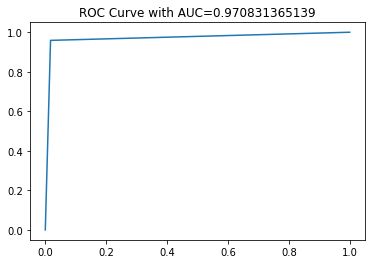

In [15]:
fpr,tpr,thresh = roc_curve(rd2bin(ytest.as_matrix()),rd2bin(ypred))
auc = roc_auc_score(rd2bin(ytest.as_matrix()),rd2bin(ypred))

plt.plot(fpr,tpr)
plt.title('ROC Curve with AUC='+str(auc));

In [16]:
model= SVC()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

zip(['Accuracy','Precision','Recall','F1'],[accuracy_score(ytest,ypred),
     precision_score(ytest,ypred,pos_label='D'),
     recall_score(ytest,ypred,pos_label='D'),
     f1_score(ytest,ypred,pos_label='D')])

[('Accuracy', 0.98473282442748089),
 ('Precision', 0.98630136986301364),
 ('Recall', 0.98630136986301364),
 ('F1', 0.98630136986301364)]

In [17]:
zip(['Accuracy CV','Precision CV','Recall CV','F1 CV'],
    [avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=accuracy_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=precision_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=recall_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=f1_scorer))])

[('Accuracy CV', 0.95402298850574718),
 ('Precision CV', 0.97712324671765616),
 ('Recall CV', 0.94756554307116103),
 ('F1 CV', 0.96180398943782353)]

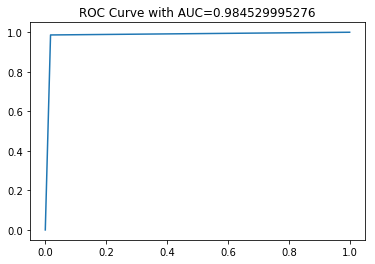

In [18]:
fpr,tpr,thresh = roc_curve(rd2bin(ytest.as_matrix()),rd2bin(ypred))
auc = roc_auc_score(rd2bin(ytest.as_matrix()),rd2bin(ypred))

plt.plot(fpr,tpr)
plt.title('ROC Curve with AUC='+str(auc));

In [19]:
model= DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

zip(['Accuracy','Precision','Recall','F1'],[accuracy_score(ytest,ypred),
     precision_score(ytest,ypred,pos_label='D'),
     recall_score(ytest,ypred,pos_label='D'),
     f1_score(ytest,ypred,pos_label='D')])

[('Accuracy', 0.93893129770992367),
 ('Precision', 0.92207792207792205),
 ('Recall', 0.9726027397260274),
 ('F1', 0.94666666666666666)]

In [20]:
zip(['Accuracy CV','Precision CV','Recall CV','F1 CV'],
    [avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=accuracy_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=precision_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=recall_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=f1_scorer))])

[('Accuracy CV', 0.94942528735632192),
 ('Precision CV', 0.97328954570333881),
 ('Recall CV', 0.95505617977528079),
 ('F1 CV', 0.95661379625046639)]

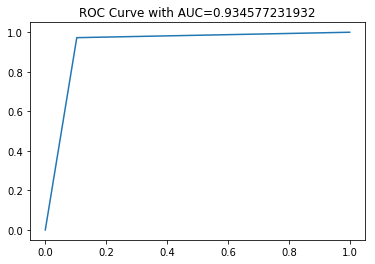

In [21]:
fpr,tpr,thresh = roc_curve(rd2bin(ytest.as_matrix()),rd2bin(ypred))
auc = roc_auc_score(rd2bin(ytest.as_matrix()),rd2bin(ypred))

plt.plot(fpr,tpr)
plt.title('ROC Curve with AUC='+str(auc));

In [22]:
model= RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

zip(['Accuracy','Precision','Recall','F1'],[accuracy_score(ytest,ypred),
     precision_score(ytest,ypred,pos_label='D'),
     recall_score(ytest,ypred,pos_label='D'),
     f1_score(ytest,ypred,pos_label='D')])


[('Accuracy', 0.97709923664122134),
 ('Precision', 0.97297297297297303),
 ('Recall', 0.98630136986301364),
 ('F1', 0.97959183673469397)]

In [23]:
zip(['Accuracy CV','Precision CV','Recall CV','F1 CV'],
    [avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=accuracy_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=precision_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=recall_scorer)),
     avnp(cross_val_score(model,X,y=rd2bin(Y),scoring=f1_scorer))])



[('Accuracy CV', 0.95862068965517233),
 ('Precision CV', 0.97372007837124119),
 ('Recall CV', 0.9438202247191011),
 ('F1 CV', 0.9714702548571631)]

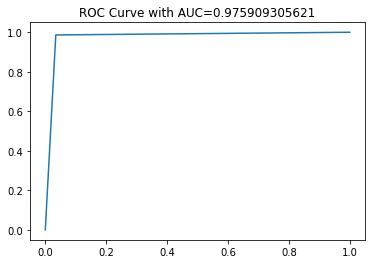

In [24]:
fpr,tpr,thresh = roc_curve(rd2bin(ytest.as_matrix()),rd2bin(ypred))
auc = roc_auc_score(rd2bin(ytest.as_matrix()),rd2bin(ypred))

plt.plot(fpr,tpr)
plt.title('ROC Curve with AUC='+str(auc));

**Challenge 4**

In [25]:
mdata = pd.read_csv('data/2013_movies.csv').dropna()
mdata['ReleaseMonth']=mdata['ReleaseDate'].str.slice(5,7).astype(int)
X=mdata.drop(['Rating','Title','ReleaseDate','Director'],axis=1)
Y=mdata.Rating
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=testsize)


In [26]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

zip(['Precision G','Recall G','Precision PG','Recall PG','Precision PG-13','Recall PG-13','Precision R','Recall R'],
        [precision_score(ytest,ypred,labels='G',average='macro'),
                recall_score(ytest,ypred,labels='G',average='macro'),
                 precision_score(ytest,ypred,labels='PG',average='macro'),
                recall_score(ytest,ypred,labels='PG',average='macro'),
                 precision_score(ytest,ypred,labels='PG-13',average='macro'),
                recall_score(ytest,ypred,labels='PG-13',average='macro'),
                 precision_score(ytest,ypred,labels='R',average='macro'),
                recall_score(ytest,ypred,labels='R',average='macro')])

## Don't know why P=R?

/Users/Adam/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Adam/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


[('Precision G', 0.0),
 ('Recall G', 0.0),
 ('Precision PG', 0.5),
 ('Recall PG', 0.45833333333333331),
 ('Precision PG-13', 0.52777777777777779),
 ('Recall PG-13', 0.51767676767676762),
 ('Precision R', 0.58333333333333337),
 ('Recall R', 0.63636363636363635)]

**Challenge 5**

In [27]:
hdata=pd.read_csv('/Users/Adam/Downloads/haberman.data',header=None)
hdata.columns=['age','year','nodes','survival']
X=hdata[['age','year','nodes']]
Y=hdata.survival
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=testsize)
ytrain -= 1
ytest -= 1

model=LogisticRegression()

model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

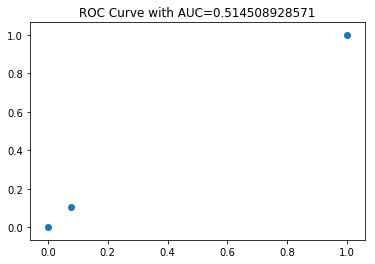

In [28]:
fpr,tpr,thresh = roc_curve(rd2bin(ytest.as_matrix()),rd2bin(ypred))
auc = roc_auc_score(rd2bin(ytest.as_matrix()),rd2bin(ypred))

plt.scatter(fpr,tpr)
plt.title('ROC Curve with AUC='+str(auc));